In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = 'retina' # 한글 폰트 사용시 글자를 선명하게 하는 명령어

# 1. Lipinski's rule of five (Pfizer's rule of five, the rule of five)
- The rule was formulated by Christopher A. Lipinski in 1997, based on the observation that most orally administered drugs are relatively small and moderately lipophilic molecules.
- No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)
- No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
- A molecular mass less than 500 daltons
- A calculated octanol-water partition coefficient (Clog P) that does not exceed 5
- Rotational bonding < 10
- PSA < 140A

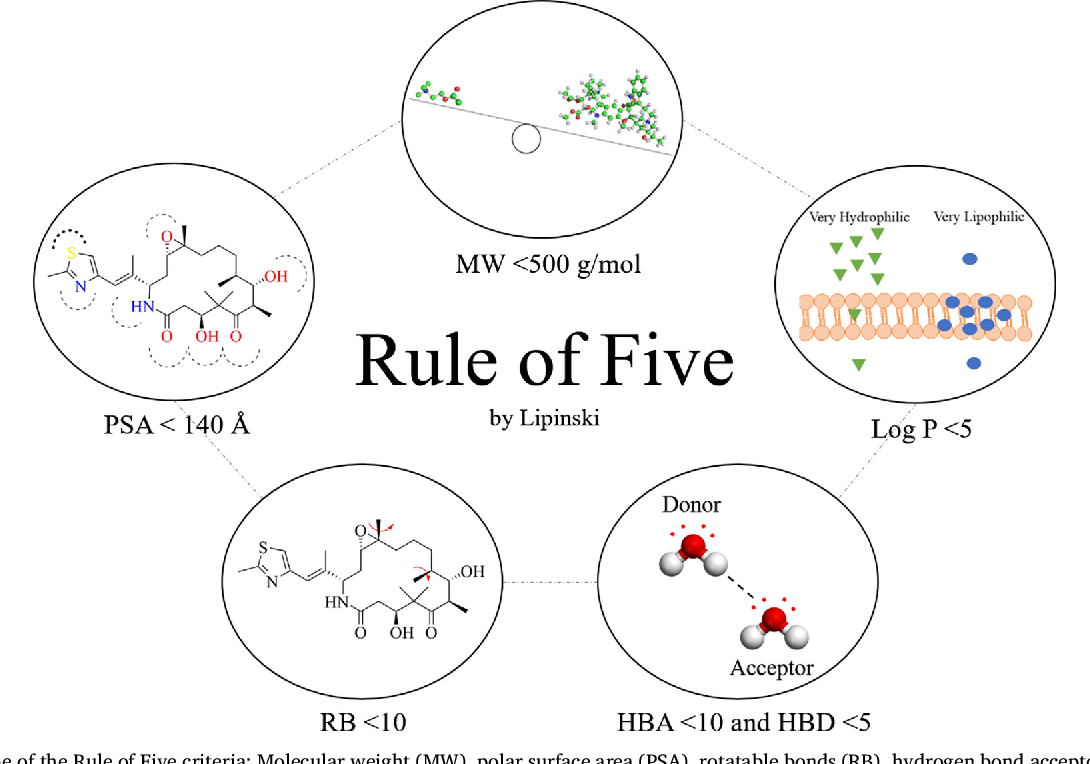

- Source: Drug metabolites and their effects on the development of adverse reactions: Revisiting Lipinski’s Rule of Five, C. M. Chagas, S. Moss, L. Alisaraie, International journal of Pharmaceutics 549 (2018) 133-149

# 2. install RDkit Package

In [3]:
!pip install rdkit-pypi

ERROR: Could not find a version that satisfies the requirement rdkit-pypi (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for rdkit-pypi


In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

# 3. Loading Chemicals' lipophilicity Data

In [4]:
logP_data = pd.read_csv('/kaggle/input/chemical-structure-and-logp/logP_dataset.csv', 
                        names=['smiles', 'logP'])

print(logP_data.shape)
logP_data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/chemical-structure-and-logp/logP_dataset.csv'

<Axes: >

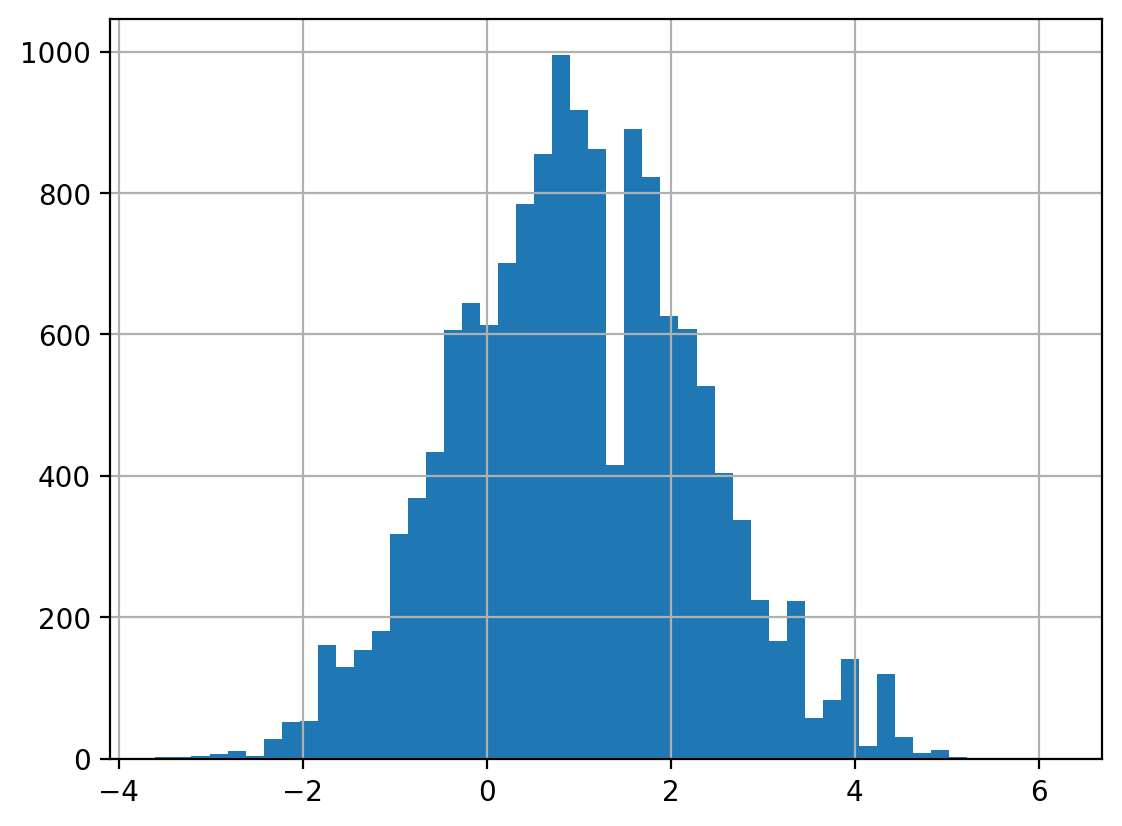

In [5]:
# distribution of logP, target value
logP_data.logP.hist(bins=50)

In [6]:
# generate mol object from smiles

df = logP_data.copy()

df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x))
df.head(2)

,smiles,logP,mol
0,C[C@H]([C@@H](C)Cl)Cl,2.3,<rdkit.Chem.rdchem.Mol object at 0x7b93b174b7d0>
1,C(C=CBr)N,0.3,<rdkit.Chem.rdchem.Mol object at 0x7b93b174b920>


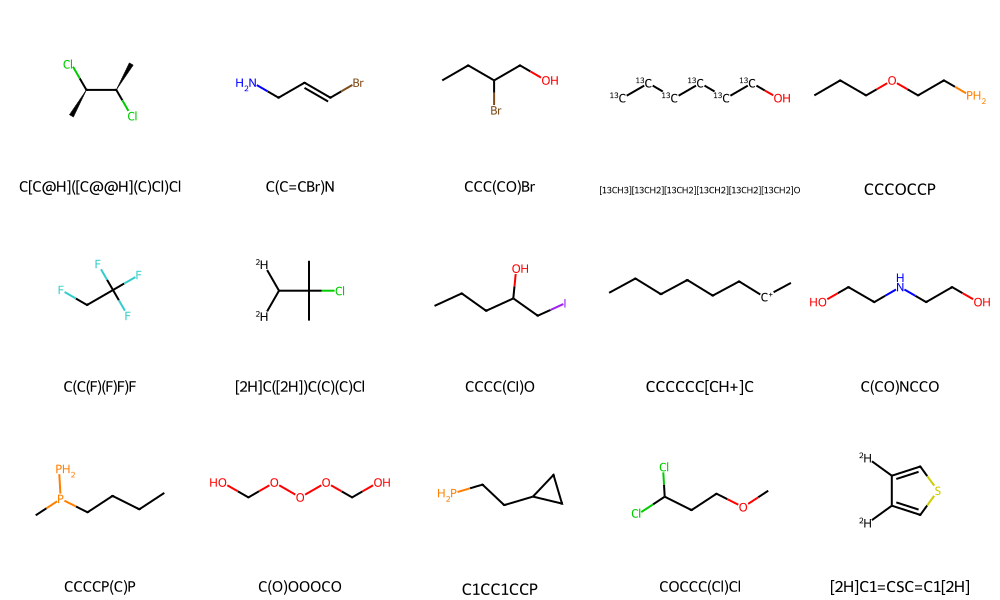

In [7]:
# first 15 mol's images
mols = df['mol'][:15]
Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True, legends=list(df['smiles'][:15].values))

# 4. Generate features from mol object

In [8]:
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x)) # add H atom
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms()) # atom's number in mol
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms()) # exclude H atom
df.head(2)

,smiles,logP,mol,num_of_atoms,num_of_heavy_atoms
0,C[C@H]([C@@H](C)Cl)Cl,2.3,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b9380>,14,6
1,C(C=CBr)N,0.3,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b93f0>,11,5


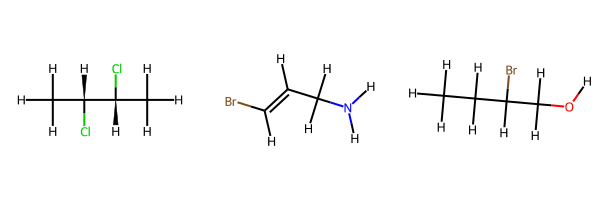

In [9]:
# Re-drawing

Draw.MolsToGridImage((df.mol[0], df.mol[1], df.mol[2]), subImgSize=(200,200))

In [10]:
# indicated atom's number in mol

def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl', 'S', 'P'], df)

df.head(20)

,smiles,logP,mol,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_S_atoms,num_of_P_atoms
0,C[C@H]([C@@H](C)Cl)Cl,2.3,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b9380>,14,6,4,0,0,2,0,0
1,C(C=CBr)N,0.3,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b93f0>,11,5,3,0,1,0,0,0
2,CCC(CO)Br,1.3,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b9460>,15,6,4,1,0,0,0,0
3,[13CH3][13CH2][13CH2][13CH2][13CH2][13CH2]O,2.0,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b94d0>,21,7,6,1,0,0,0,0
4,CCCOCCP,0.6,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b9540>,20,7,5,1,0,0,0,1
5,C(C(F)(F)F)F,1.7,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b95b0>,8,6,2,0,0,0,0,0
6,[2H]C([2H])C(C)(C)Cl,1.8,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b9620>,14,5,4,0,0,1,0,0
7,CCCC(CI)O,2.0,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b9690>,18,7,5,1,0,0,0,0
8,CCCCCC[CH+]C,3.9,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b9700>,25,8,8,0,0,0,0,0
9,C(CO)NCCO,-1.4,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b9770>,18,7,4,2,1,0,0,0


# 5. Linear Regression Model-1

In [11]:
# feature and target

from sklearn.model_selection import train_test_split

feature = df.drop(columns=['smiles', 'mol', 'logP'])
target = df['logP'].values

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11688, 8), (2922, 8), (11688,), (2922,))

In [12]:
def show_reg_result(y_test, y_pred, N=75):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    R2 = r2_score(y_test, y_pred)
    max_err = np.abs(y_test - y_pred).max()

    print('R2:', round(R2, 4))
    print('MAE:', round(mae, 4))
    print('RMSE:', round(rmse,4))
    print('Max error:', round(max_err, 4))

    # ploting with real and pred values

    if N > 0: 
        plt.figure(figsize=(12, 4)) 
        plt.plot(y_pred[:N], ".b-", label="prediction", linewidth=1.0) 
        plt.plot(y_test[:N], '.r-', label="actual", linewidth=1.0) 
        plt.legend() 
        plt.ylabel('logP') 
        plt.show()

R2: 0.7208
MAE: 0.524
RMSE: 0.6807
Max error: 3.2805


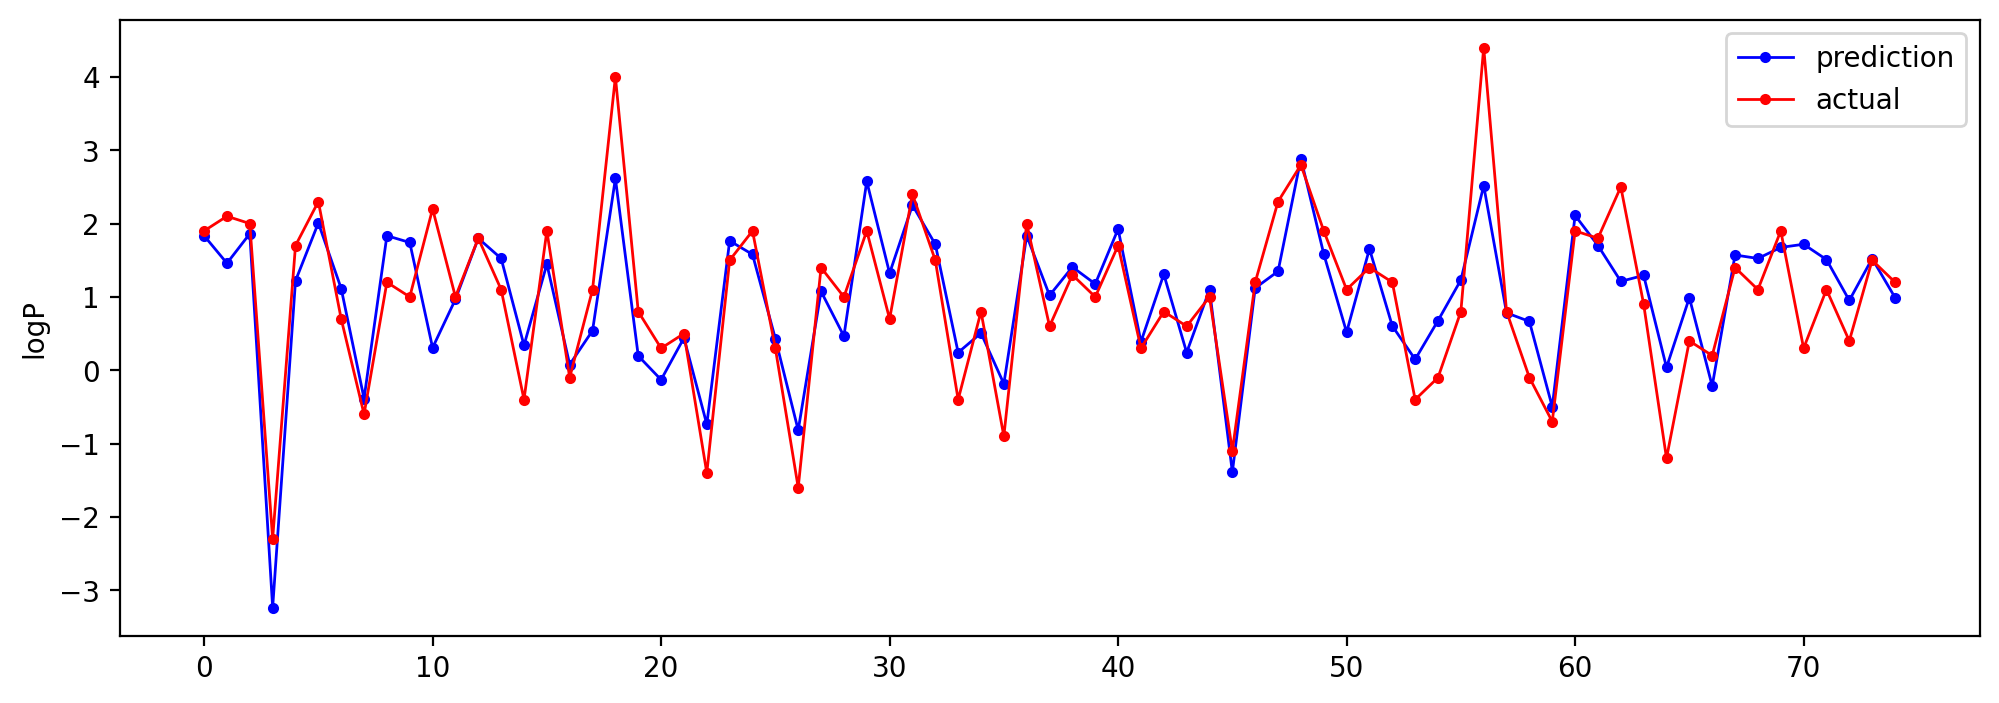

In [13]:
# Linear Regression Model-1

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
show_reg_result(y_test, y_pred)

# 6. Add the more features through Descriptors
- TPSA() - the surface sum over all polar atoms or molecules also including their attached hydrogen atoms
- ExactMolWt() - mol weight
- NumValenceElectrons() - number of valence electrons (may illustrate general electronic density)
- NumHeteroatoms() - general number of non-carbon atoms

In [14]:
df['tpsa'] = df['mol'].apply(lambda x: Descriptors.TPSA(x))
df['mol_w'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
df['num_valence_electrons'] = df['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
df['num_heteroatoms'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))

In [15]:
df.head()

,smiles,logP,mol,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_S_atoms,num_of_P_atoms,tpsa,mol_w,num_valence_electrons,num_heteroatoms
0,C[C@H]([C@@H](C)Cl)Cl,2.3,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b9380>,14,6,4,0,0,2,0,0,0.00,126.000306,38,2
1,C(C=CBr)N,0.3,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b93f0>,11,5,3,0,1,0,0,0,26.02,134.968361,30,2
2,CCC(CO)Br,1.3,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b9460>,15,6,4,1,0,0,0,0,20.23,151.983677,38,2
3,[13CH3][13CH2][13CH2][13CH2][13CH2][13CH2]O,2.0,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b94d0>,21,7,6,1,0,0,0,0,20.23,108.124594,44,1
4,CCCOCCP,0.6,<rdkit.Chem.rdchem.Mol object at 0x7b93af1b9540>,20,7,5,1,0,0,0,1,9.23,120.070402,44,2


In [16]:
feature = df.drop(columns=['smiles', 'mol', 'logP'])
target = df['logP'].values

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=.2, random_state=2310)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11688, 12), (2922, 12), (11688,), (2922,))

# 7. Linear Regression Model-2

R2: 0.7857
MAE: 0.4556
RMSE: 0.604
Max error: 3.645


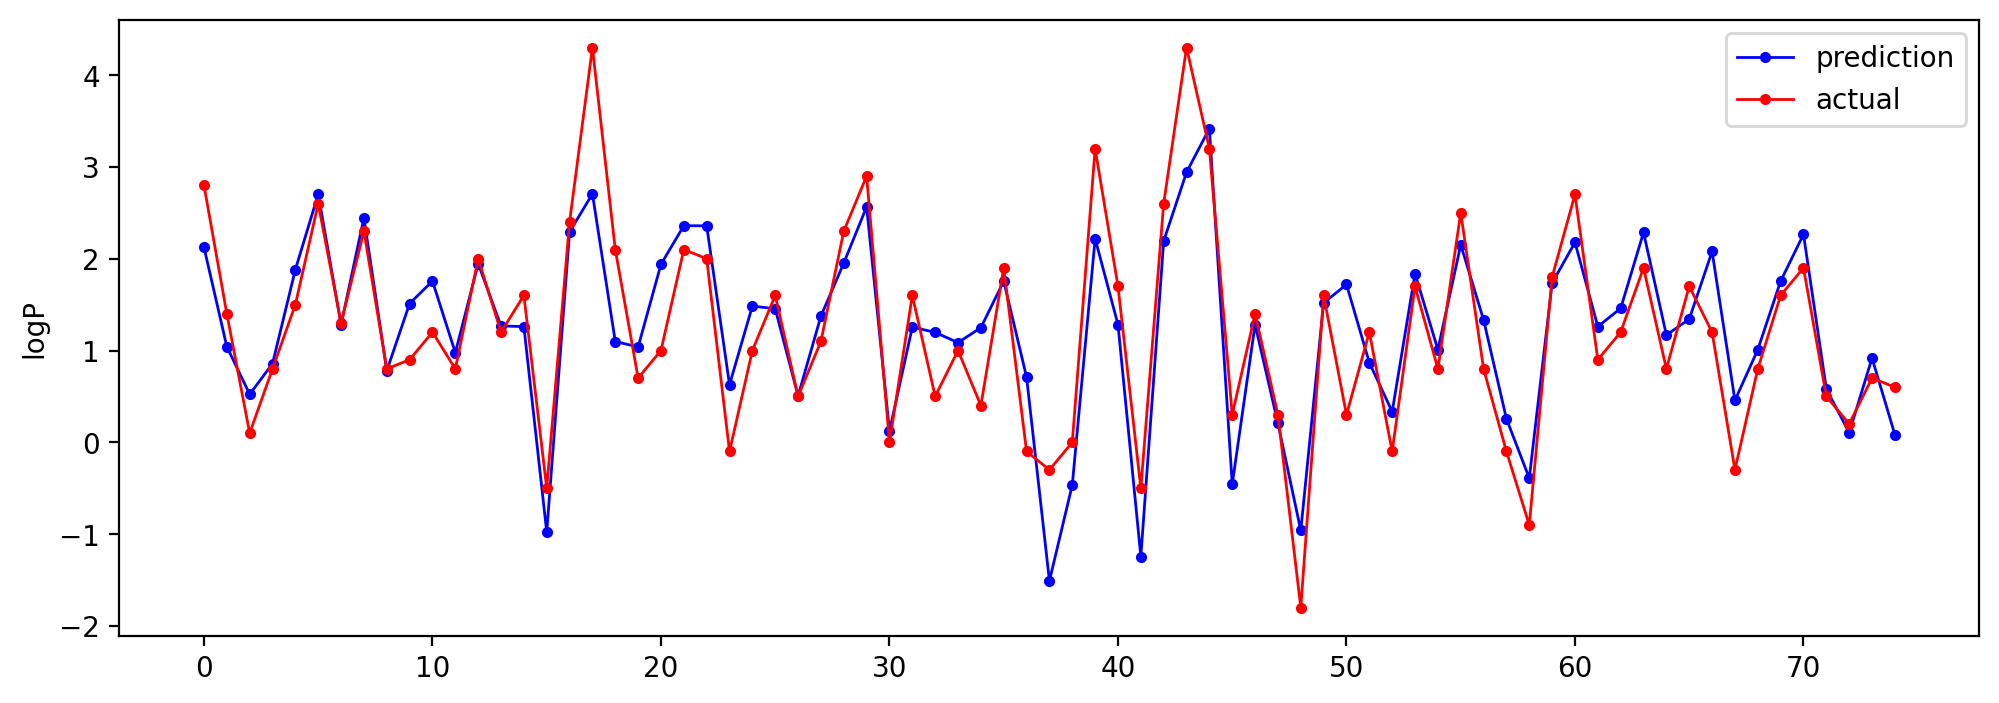

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
show_reg_result(y_test, y_pred,75)

In [18]:
X_train.columns

Index(['num_of_atoms', 'num_of_heavy_atoms', 'num_of_C_atoms',
       'num_of_O_atoms', 'num_of_N_atoms', 'num_of_Cl_atoms', 'num_of_S_atoms',
       'num_of_P_atoms', 'tpsa', 'mol_w', 'num_valence_electrons',
       'num_heteroatoms'],
      dtype='object')

In [19]:
y_train

array([0.5, 0.4, 1.2, ..., 1.3, 1.6, 1.3])

In [20]:
lr.coef_

array([-0.14225037, -0.18712736,  0.16269942, -0.11837529, -0.1124864 ,
        0.13222705,  0.0341377 , -0.41558575, -0.03468283,  0.00560744,
        0.11757032, -0.34982678])

In [21]:
lr.intercept_ 

0.1802643536601708

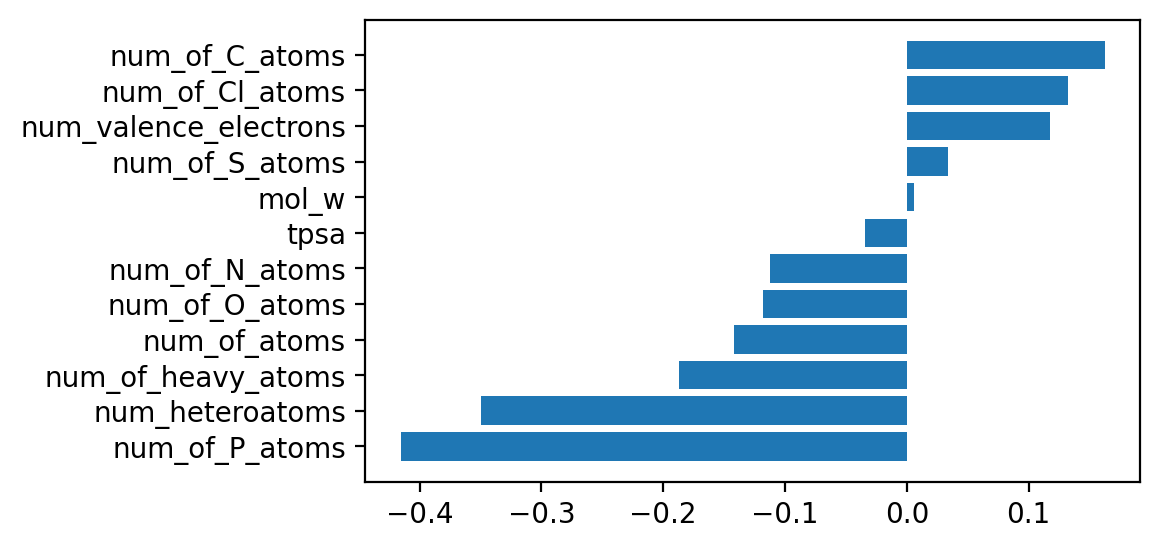

In [22]:
# feature importances

def plot_feature_weight(feature, weight):
    plt.figure(figsize=(5,3)) 
    W = pd.DataFrame({'feature':feature,'weight':weight})
    W.sort_values('weight', inplace=True)
    plt.barh(W.feature, W.weight)
    
plot_feature_weight(feature.columns, lr.coef_)

# 8. Decision Tree Regressor Model

In [23]:
# to find max_depth
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

res = []
for depth in range(1,50,2):
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(X_train, y_train)
    res.append((depth, dtr.score(X_test, y_test).round(4)))
res[:5]

[(1, 0.405), (3, 0.701), (5, 0.8125), (7, 0.8559), (9, 0.8759)]

In [24]:
df_res = pd.DataFrame(res, columns=['depth', 'score']).set_index('depth')
df_res[:5]

,score
depth,
1,0.4050
3,0.7010
5,0.8125
7,0.8559
9,0.8759


<Axes: xlabel='depth'>

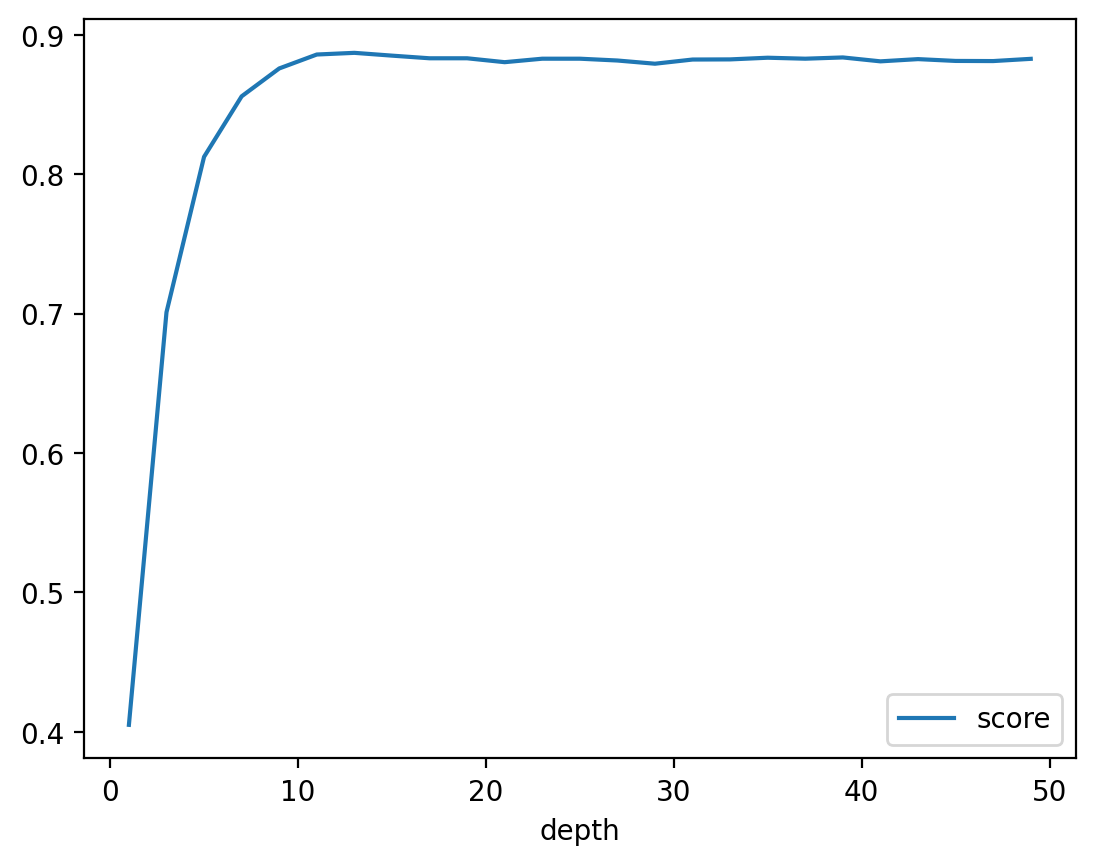

In [25]:
df_res.plot()

In [26]:
df_res.idxmax(), df_res.max()

(score    13
 dtype: int64,
 score    0.8871
 dtype: float64)

R2: 0.8838
MAE: 0.3054
RMSE: 0.4447
Max error: 3.7


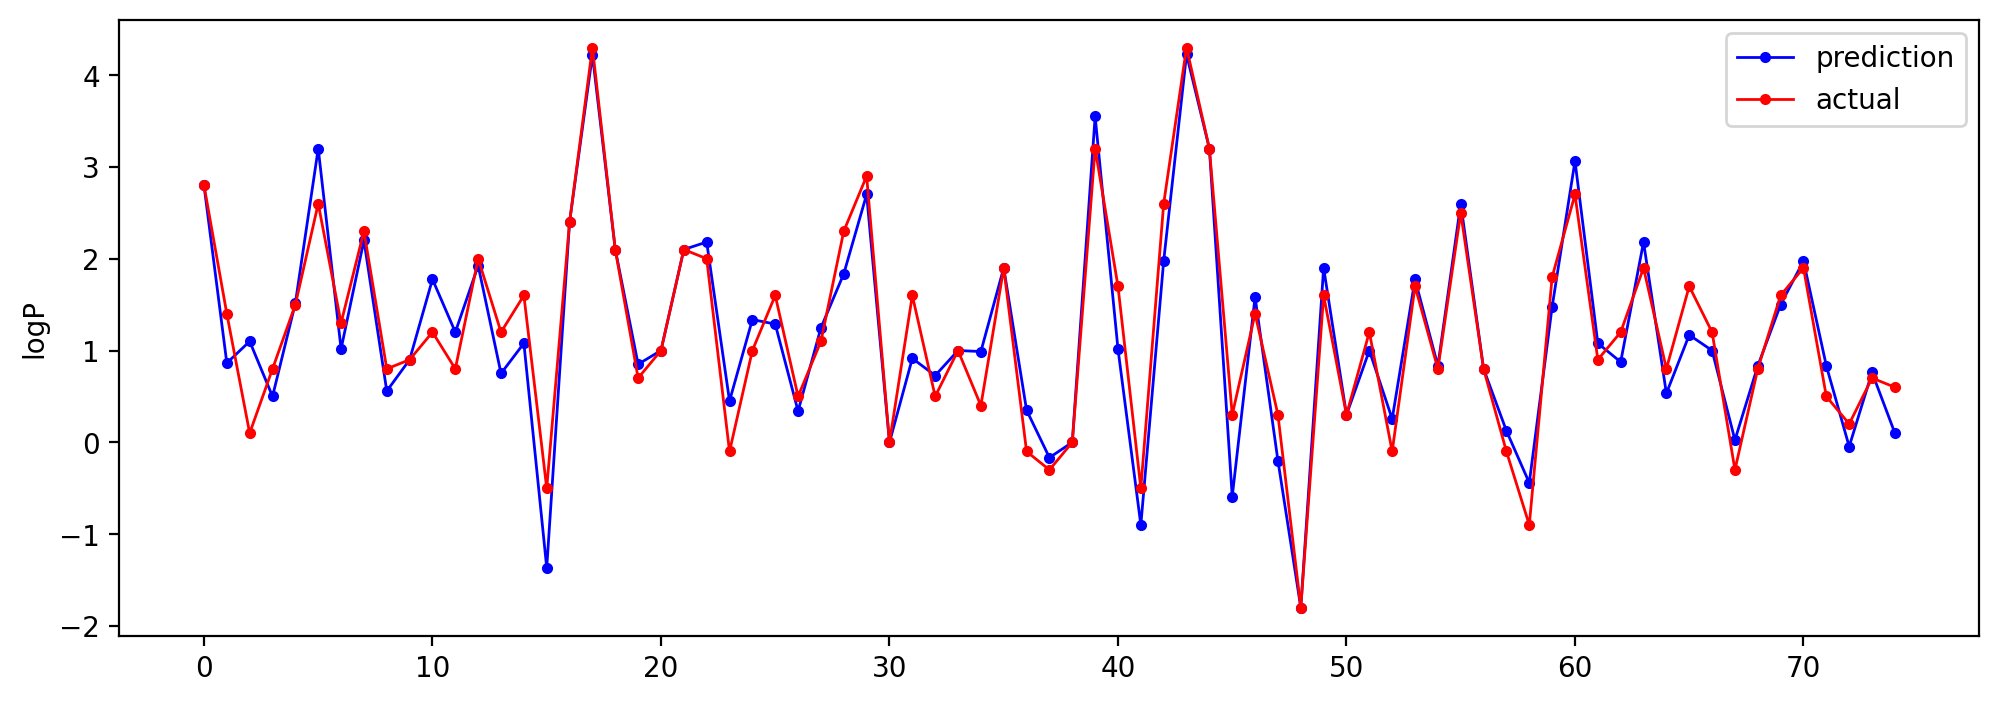

In [27]:
# ploting with real and pred values

dtr = DecisionTreeRegressor(max_depth=21)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
show_reg_result(y_test, y_pred)

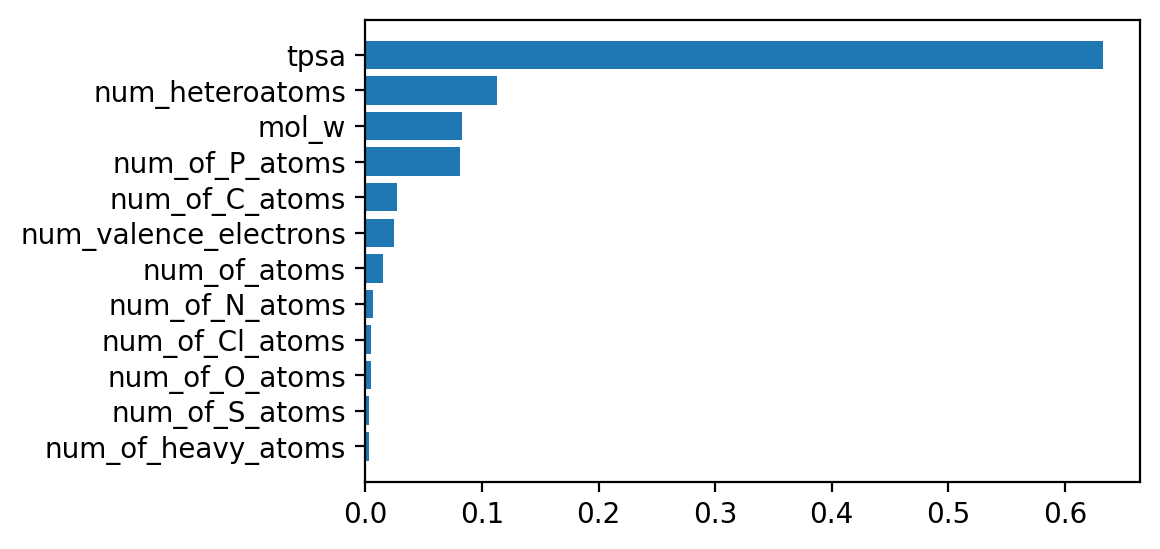

In [28]:
# feature importances

plot_feature_weight(feature.columns, dtr.feature_importances_)

# 9. Random Forest Regressor Model

R2: 0.9043
MAE: 0.2901
RMSE: 0.4037
Max error: 3.6403


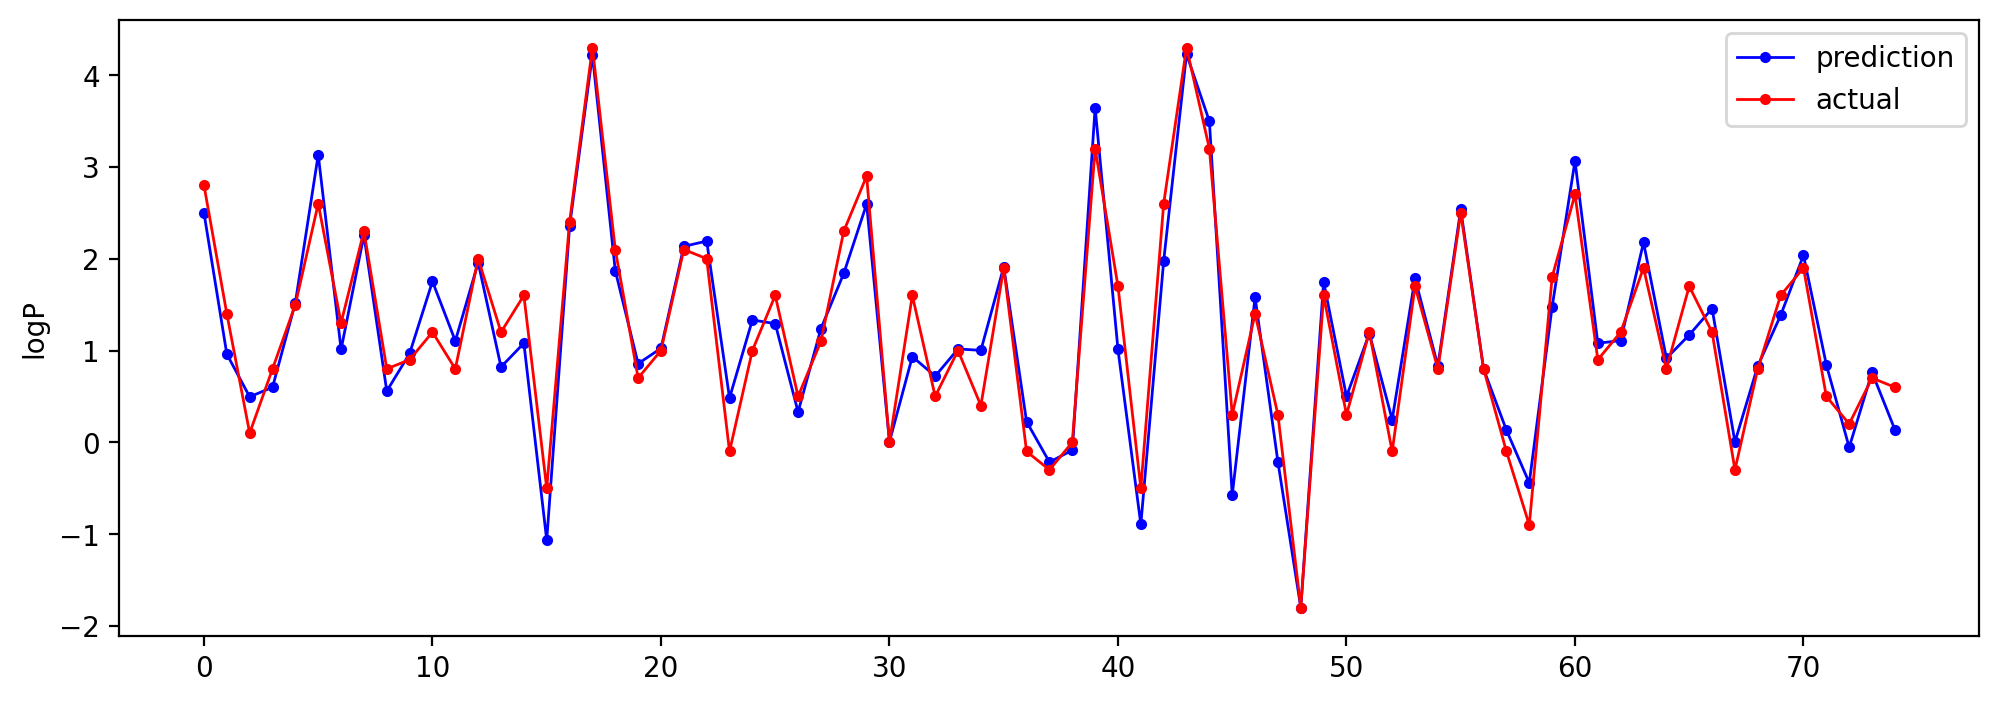

In [29]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
show_reg_result(y_test, y_pred)

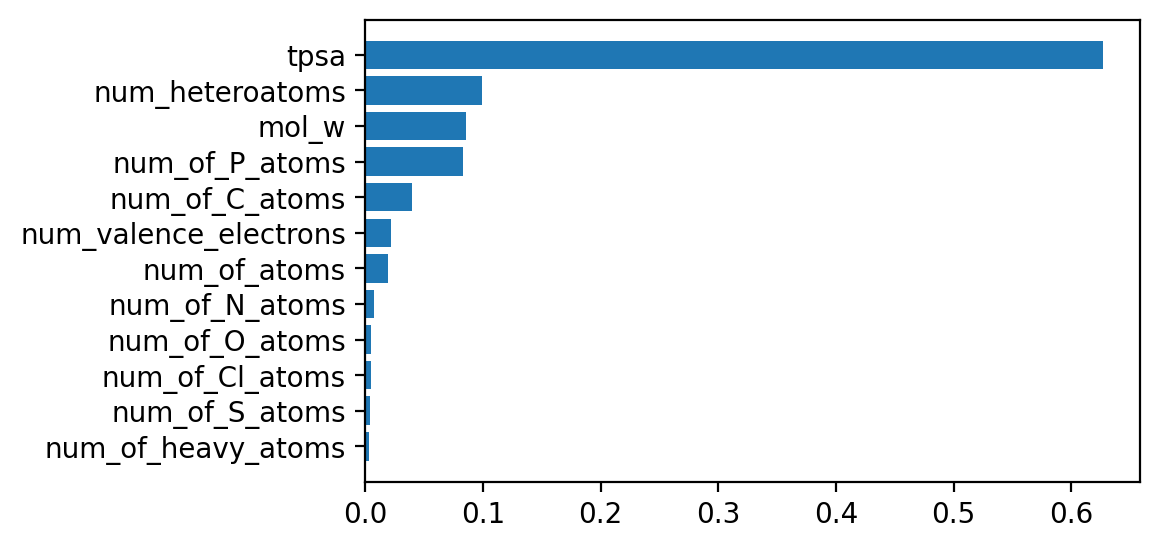

In [30]:
# feature importance

plot_feature_weight(feature.columns, rfr.feature_importances_)

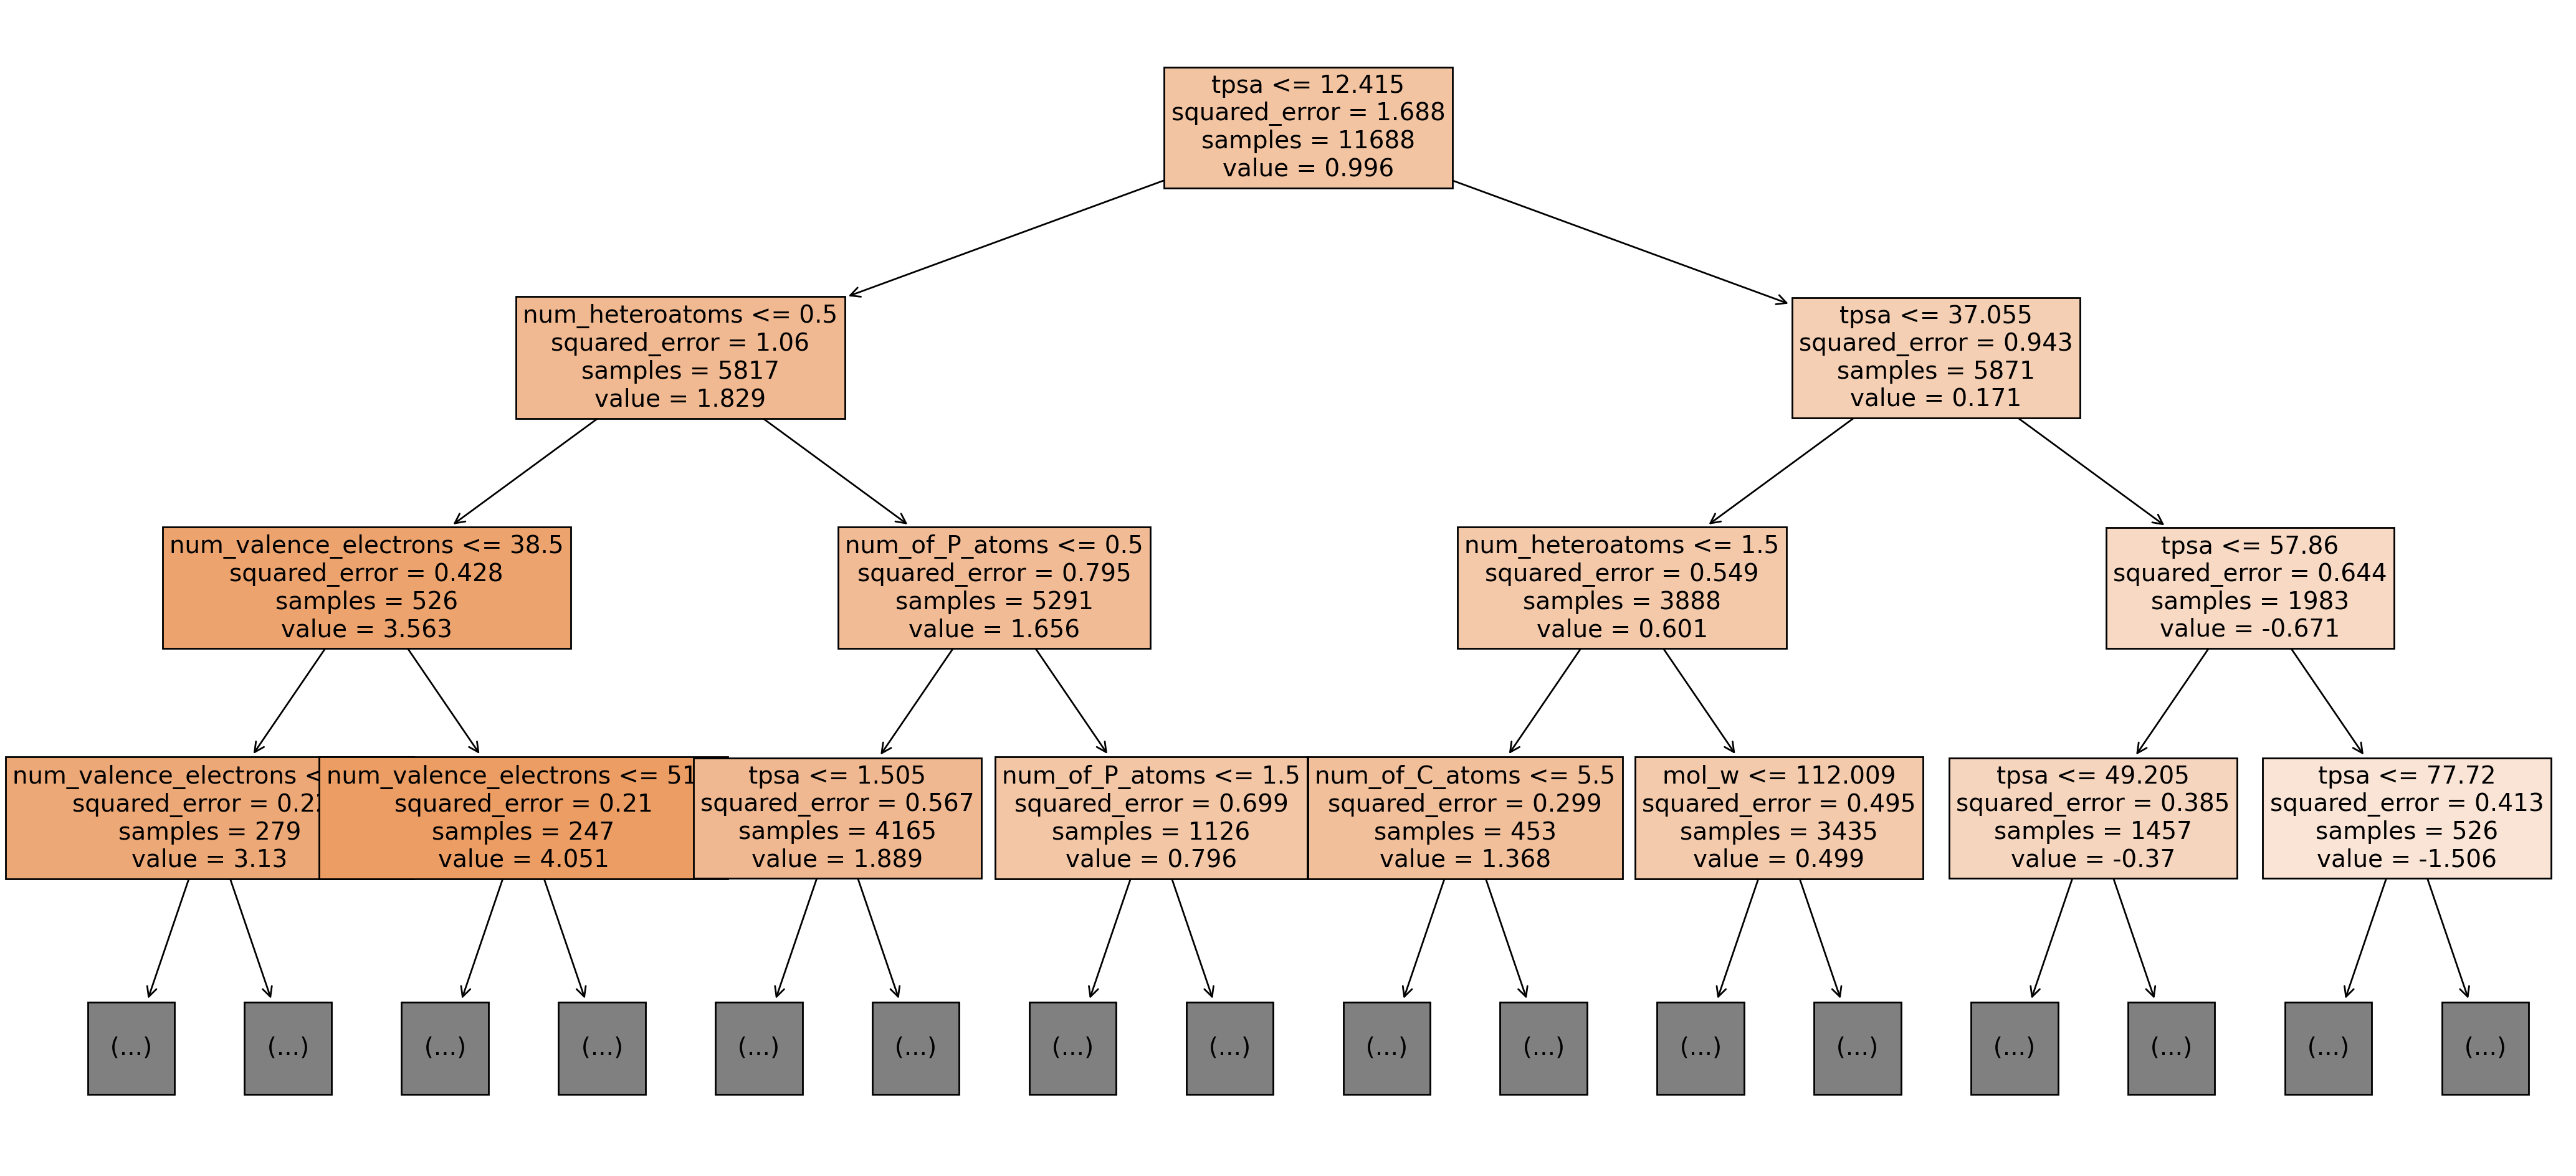

In [31]:
from sklearn import tree
import matplotlib
plt.figure(figsize=(26,12))

tree.plot_tree(dtr, fontsize=14,
              feature_names=feature.columns,
              filled=True,
              impurity=True,
              max_depth=3)
plt.show()

# 10. Generate Fingerprint Descriptor

In [32]:
def mol_2_fp(mol):
  fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
  return fp

In [33]:
list_fp = df['mol'].apply(mol_2_fp)
ecfp = np.vstack(list_fp)
print(ecfp.shape)
ecfp[:3]

(14610, 1024)


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

# 11. Modeling with Fingerprint Descriptor

In [34]:
X_train, X_test, y_train, y_test = train_test_split(ecfp, target, test_size=.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11688, 1024), (2922, 1024), (11688,), (2922,))

In [35]:
# linear regression model

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
show_reg_result(y_test, y_pred, 0)

R2: 0.7644
MAE: 0.4661
RMSE: 0.6201
Max error: 3.1717


In [36]:
# Light GBM model

from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor()
lgbmr.fit(X_train, y_train)
y_pred = lgbmr.predict(X_test)
show_reg_result(y_test, y_pred,0)

R2: 0.8415
MAE: 0.3724
RMSE: 0.5086
Max error: 3.1741


R2: 0.8415
MAE: 0.3724
RMSE: 0.5086
Max error: 3.1741


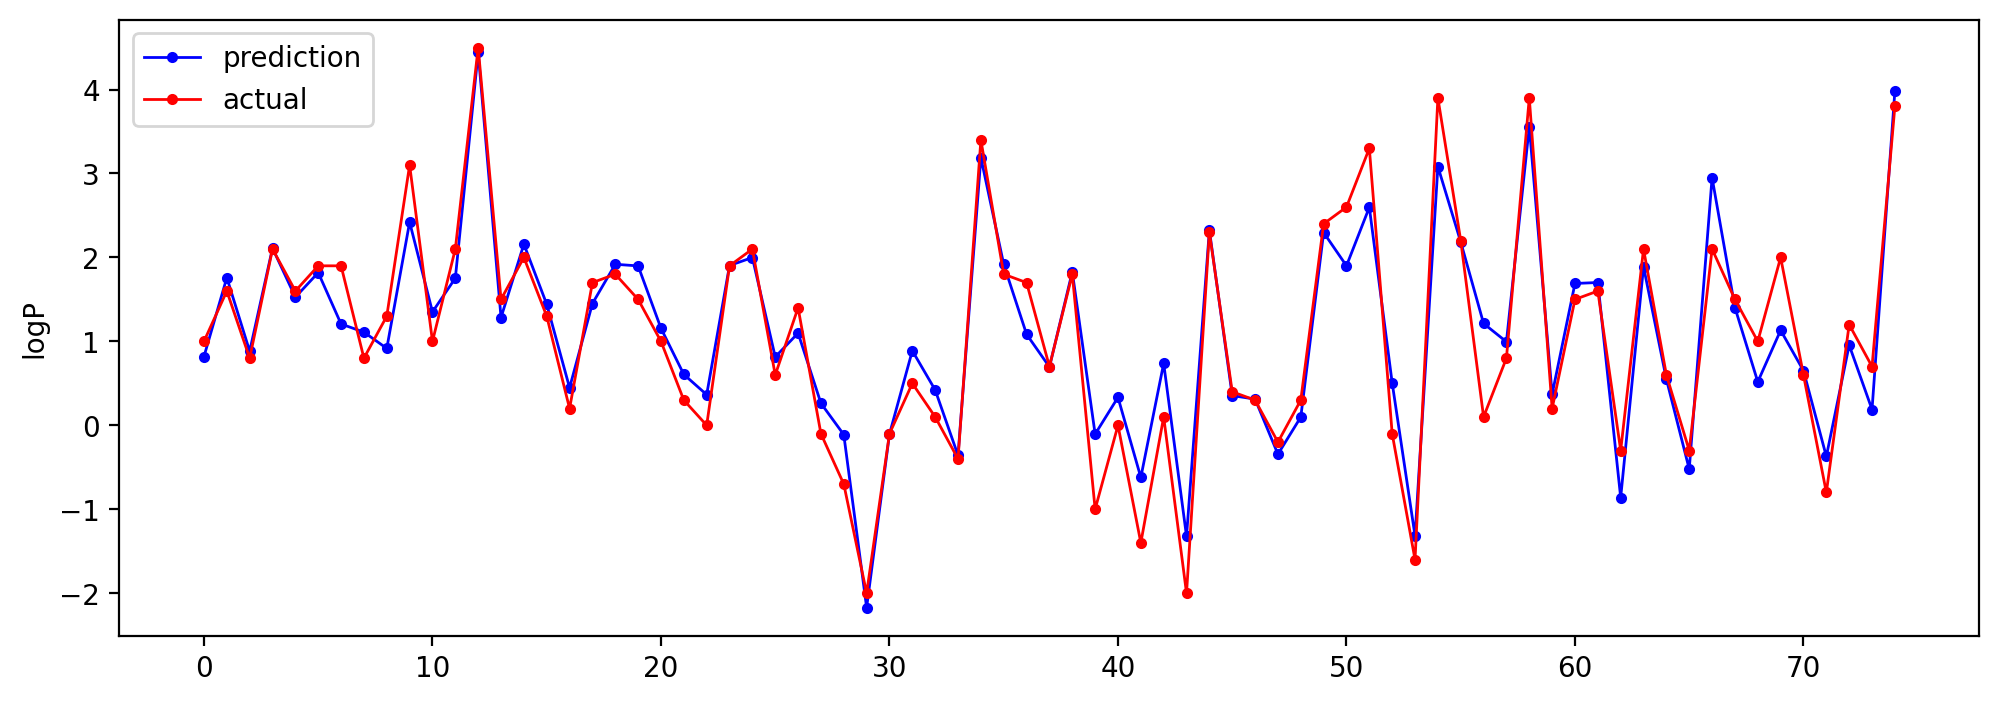

In [37]:
# ploting with real and pred values

lgbmr.fit(X_train, y_train)
y_pred = lgbmr.predict(X_test)
show_reg_result(y_test, y_pred)